In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test_accs_all1 = []
# ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
ckpts = ["311", "623", "935", "1246", "1558", "1866"]

for ckpt in ckpts:
    test_accs = (np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-05/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all1.append(test_accs.max(axis=-1).mean())
    test_accs_all1.append(test_accs.mean())

test_accs_all1 = np.array(test_accs_all1)
print(test_accs_all1)

0.1473843821076573
0.21501137225170583
0.24579226686884004
0.2918877937831691
0.30022744503411675
0.32236542835481424
[0.14738438 0.21501137 0.24579227 0.29188779 0.30022745 0.32236543]


In [3]:
dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

In [4]:
num_memorized_all1 = []
num_correct_different_all1 = []
num_incorrect_all1 = []

# ckpts = ["3332", "6664", "9996", "13328", "16660"]
ckpts = ["311", "623", "935", "1246", "1558", "1866"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-05/checkpoint-"+ckpt+ "/train_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-05/checkpoint-"+ckpt+ "/train_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all1.append(num_memorized_ckpt)
    num_correct_different_all1.append(num_correct_different_ckpt)
    num_incorrect_all1.append(num_incorrect_ckpt)
    
num_memorized_all1 = np.array(num_memorized_all1)
num_correct_different_all1 = np.array(num_correct_different_all1)
num_incorrect_all1 = np.array(num_incorrect_all1)

In [5]:
num_memorized_all1_weird = []
num_correct_different_all1_weird = []
num_incorrect_all1_weird = []

# ckpts = ["3332", "6664", "9996", "13328", "16660"]
ckpts = ["311", "623", "935", "1246", "1558", "1866"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-05/checkpoint-"+ckpt+ "/train_weird_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-05/checkpoint-"+ckpt+ "/train_weird_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all1_weird.append(num_memorized_ckpt)
    num_correct_different_all1_weird.append(num_correct_different_ckpt)
    num_incorrect_all1_weird.append(num_incorrect_ckpt)
    
num_memorized_all1_weird = np.array(num_memorized_all1_weird)
num_correct_different_all1_weird = np.array(num_correct_different_all1_weird)
num_incorrect_all1_weird = np.array(num_incorrect_all1_weird)

In [60]:
train_samples = (np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-05/checkpoint-"+"1866"+ "/train_weird_answers5_seed2.npy"))

In [72]:
train_samples[50]

array([' Hee needs to save up $400 because 4 x 100 = <<4*100=400>>400\nHee needs to earn $100 a month because 400 / 4 = <<400/4=100>>100\nHee needs to do 10 batches of baseeball because 100 / 10 = <<100/10=10>>10\nHee needs to do 40 cchores because 10 x 4 = <<10*4=40>>40\n#### 40',
       ' Hee has 4 weeks to earn this money because 4 x 12 = <<4*12=48>>48\nHee has earned $4 in 4 weeks because 48 x .05 = <<48*.05=4>>4\nHee has $96 to use for his supplies because 4 x 24 = <<4*24=96>>96\nHee has to use 12 cchoores because 96 / 8 = <<96/8=12>>12\n#### 12',
       " Hee is charged $10 per month, so the first month he earns $10 x 12 = $<<10*12=120>>120.\nHee has 4 months to earn this money, so he'll earn $120 x 4 = $<<120*4=480>>480.\nHee will use $480 / $100 = <<480/100=5>>5 of the cchores he needs.\n#### 5",
       " Hee has 4 months to save up $100, so he's saving $100/4 = $<<100/4=25>>25 per month.\nHee will charge $10 for each of the 3 monthly costs, so he will charge $10*3 = $<<10*3=30

In [71]:
train_answers[50]

'He needs to save up $400 because 4 x 100 = <<4*100=400>>400\nHe has 8 months to earn this money because 12 - 4 = <<12-4=8>>8\nHe needs to earn $50 a month because 400 / 8 = <<400/8=50>>50\nHe needs to do 5 tasks a month because 50 / 10 = <<50/10=5>>5\n#### 5'

In [76]:
train_questions[1203]

'Josh has some money. He spent $1.75 on a drink, and then spent another $1.25. If he had $6 left, how much money, in dollars, did Josh have at first?'

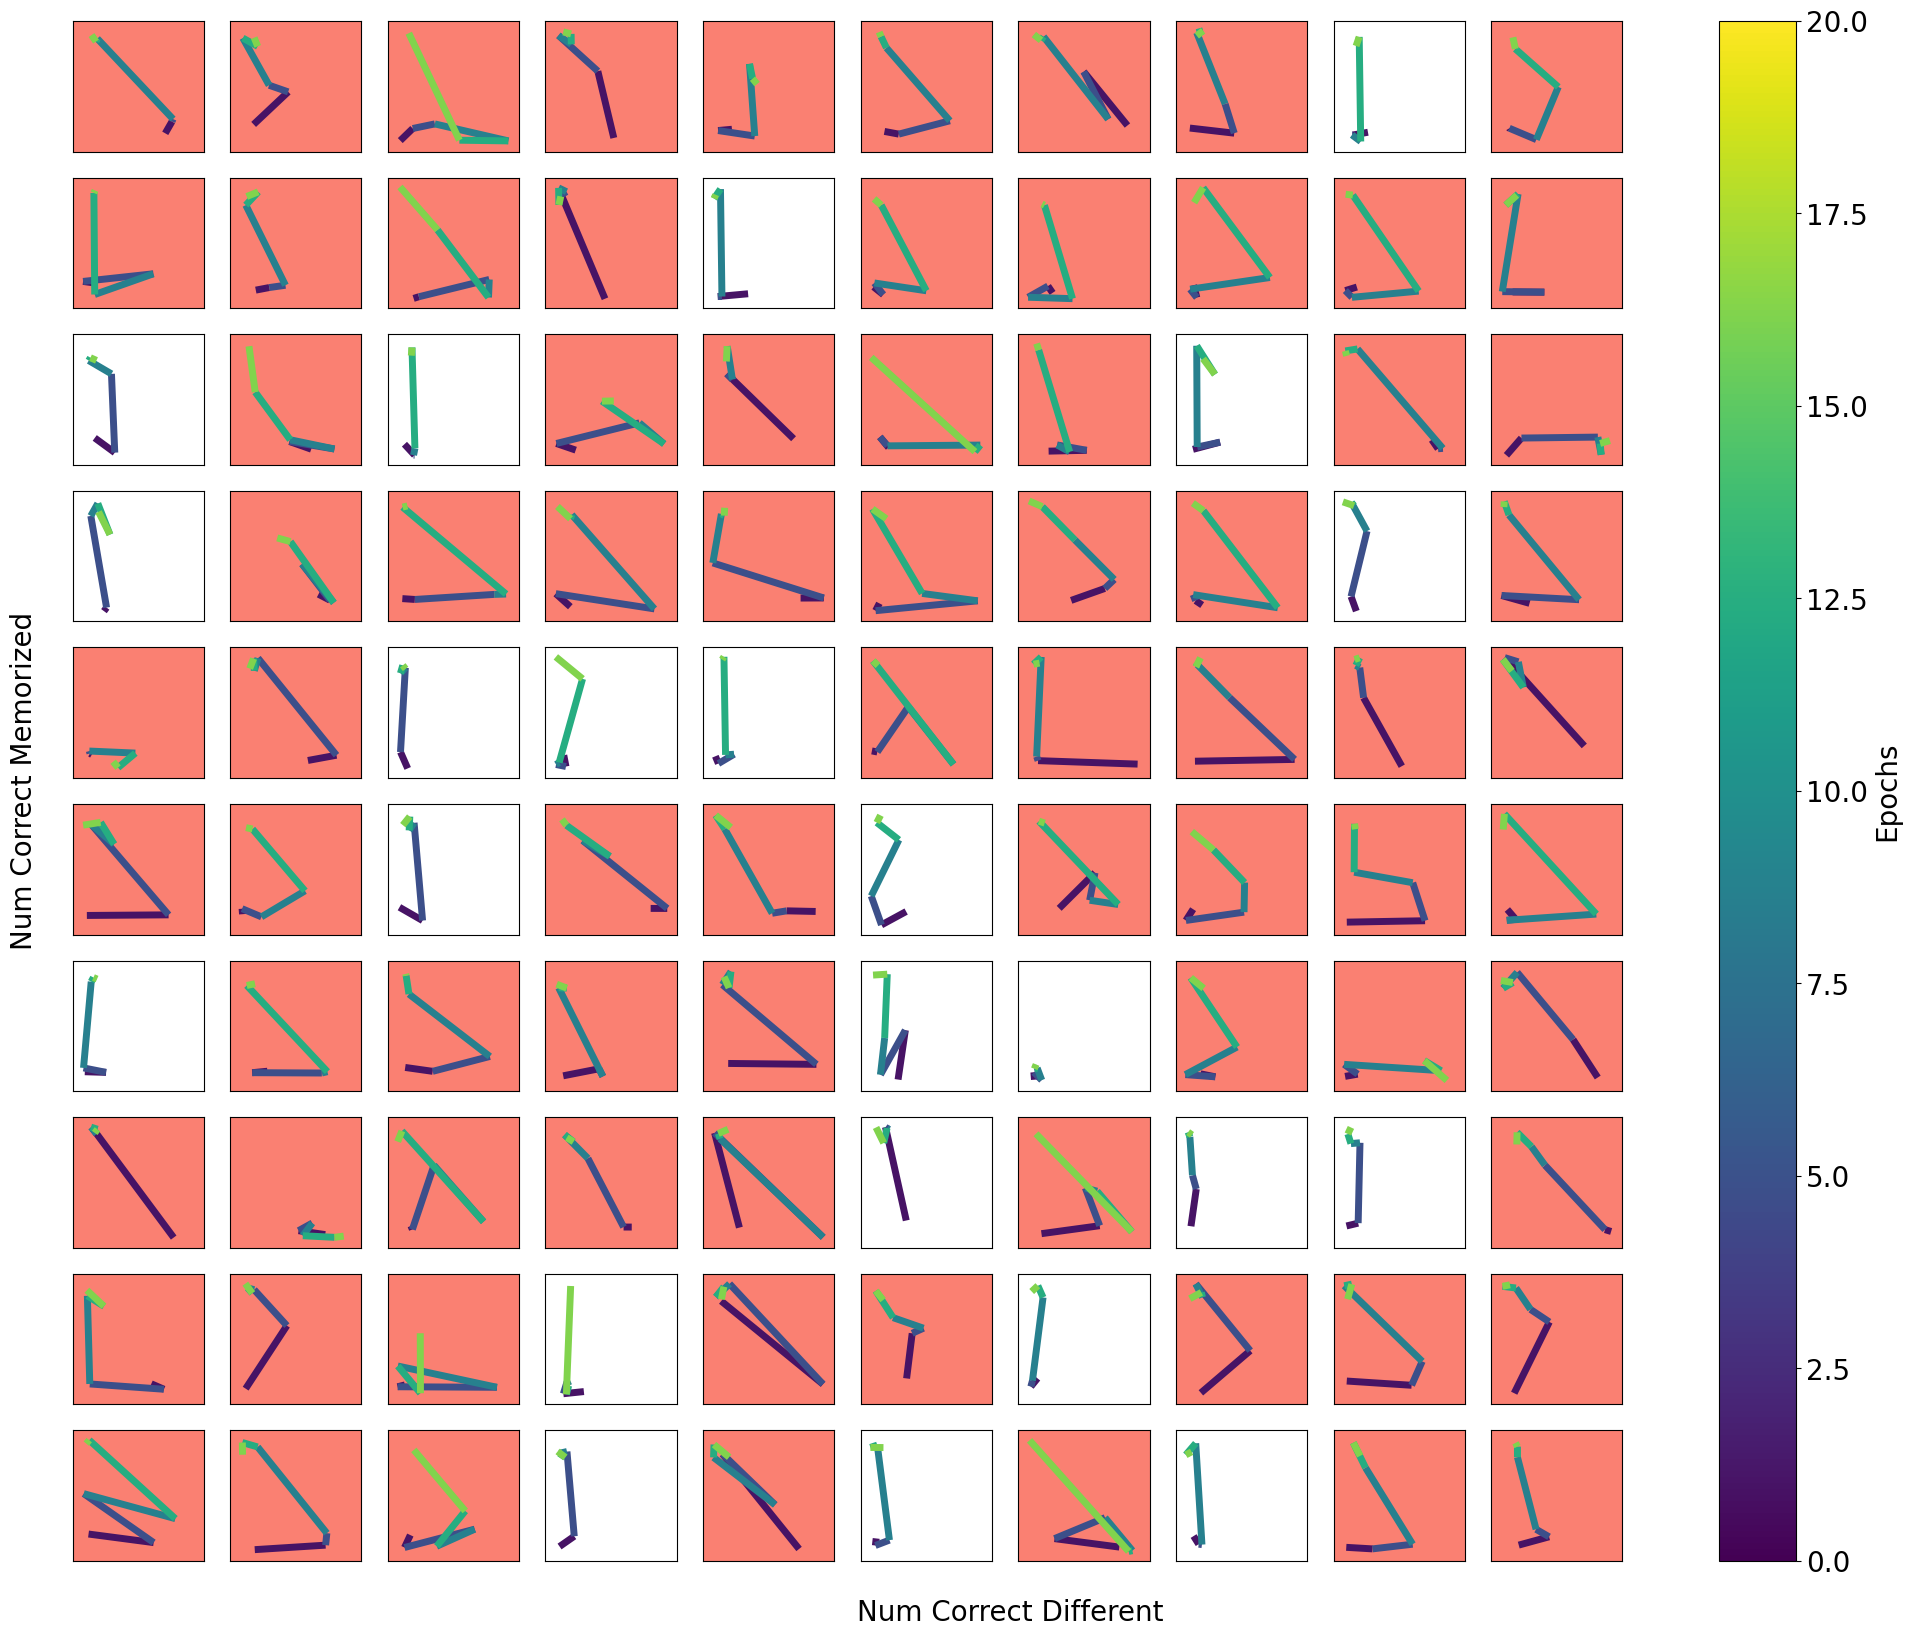

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 6)




for i in range(100):
    x = num_correct_different_all1[:, i]+np.random.uniform(-0.5, 0.5, 6)
    y = num_memorized_all1[:, i]+np.random.uniform(-0.5, 0.5, 6)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

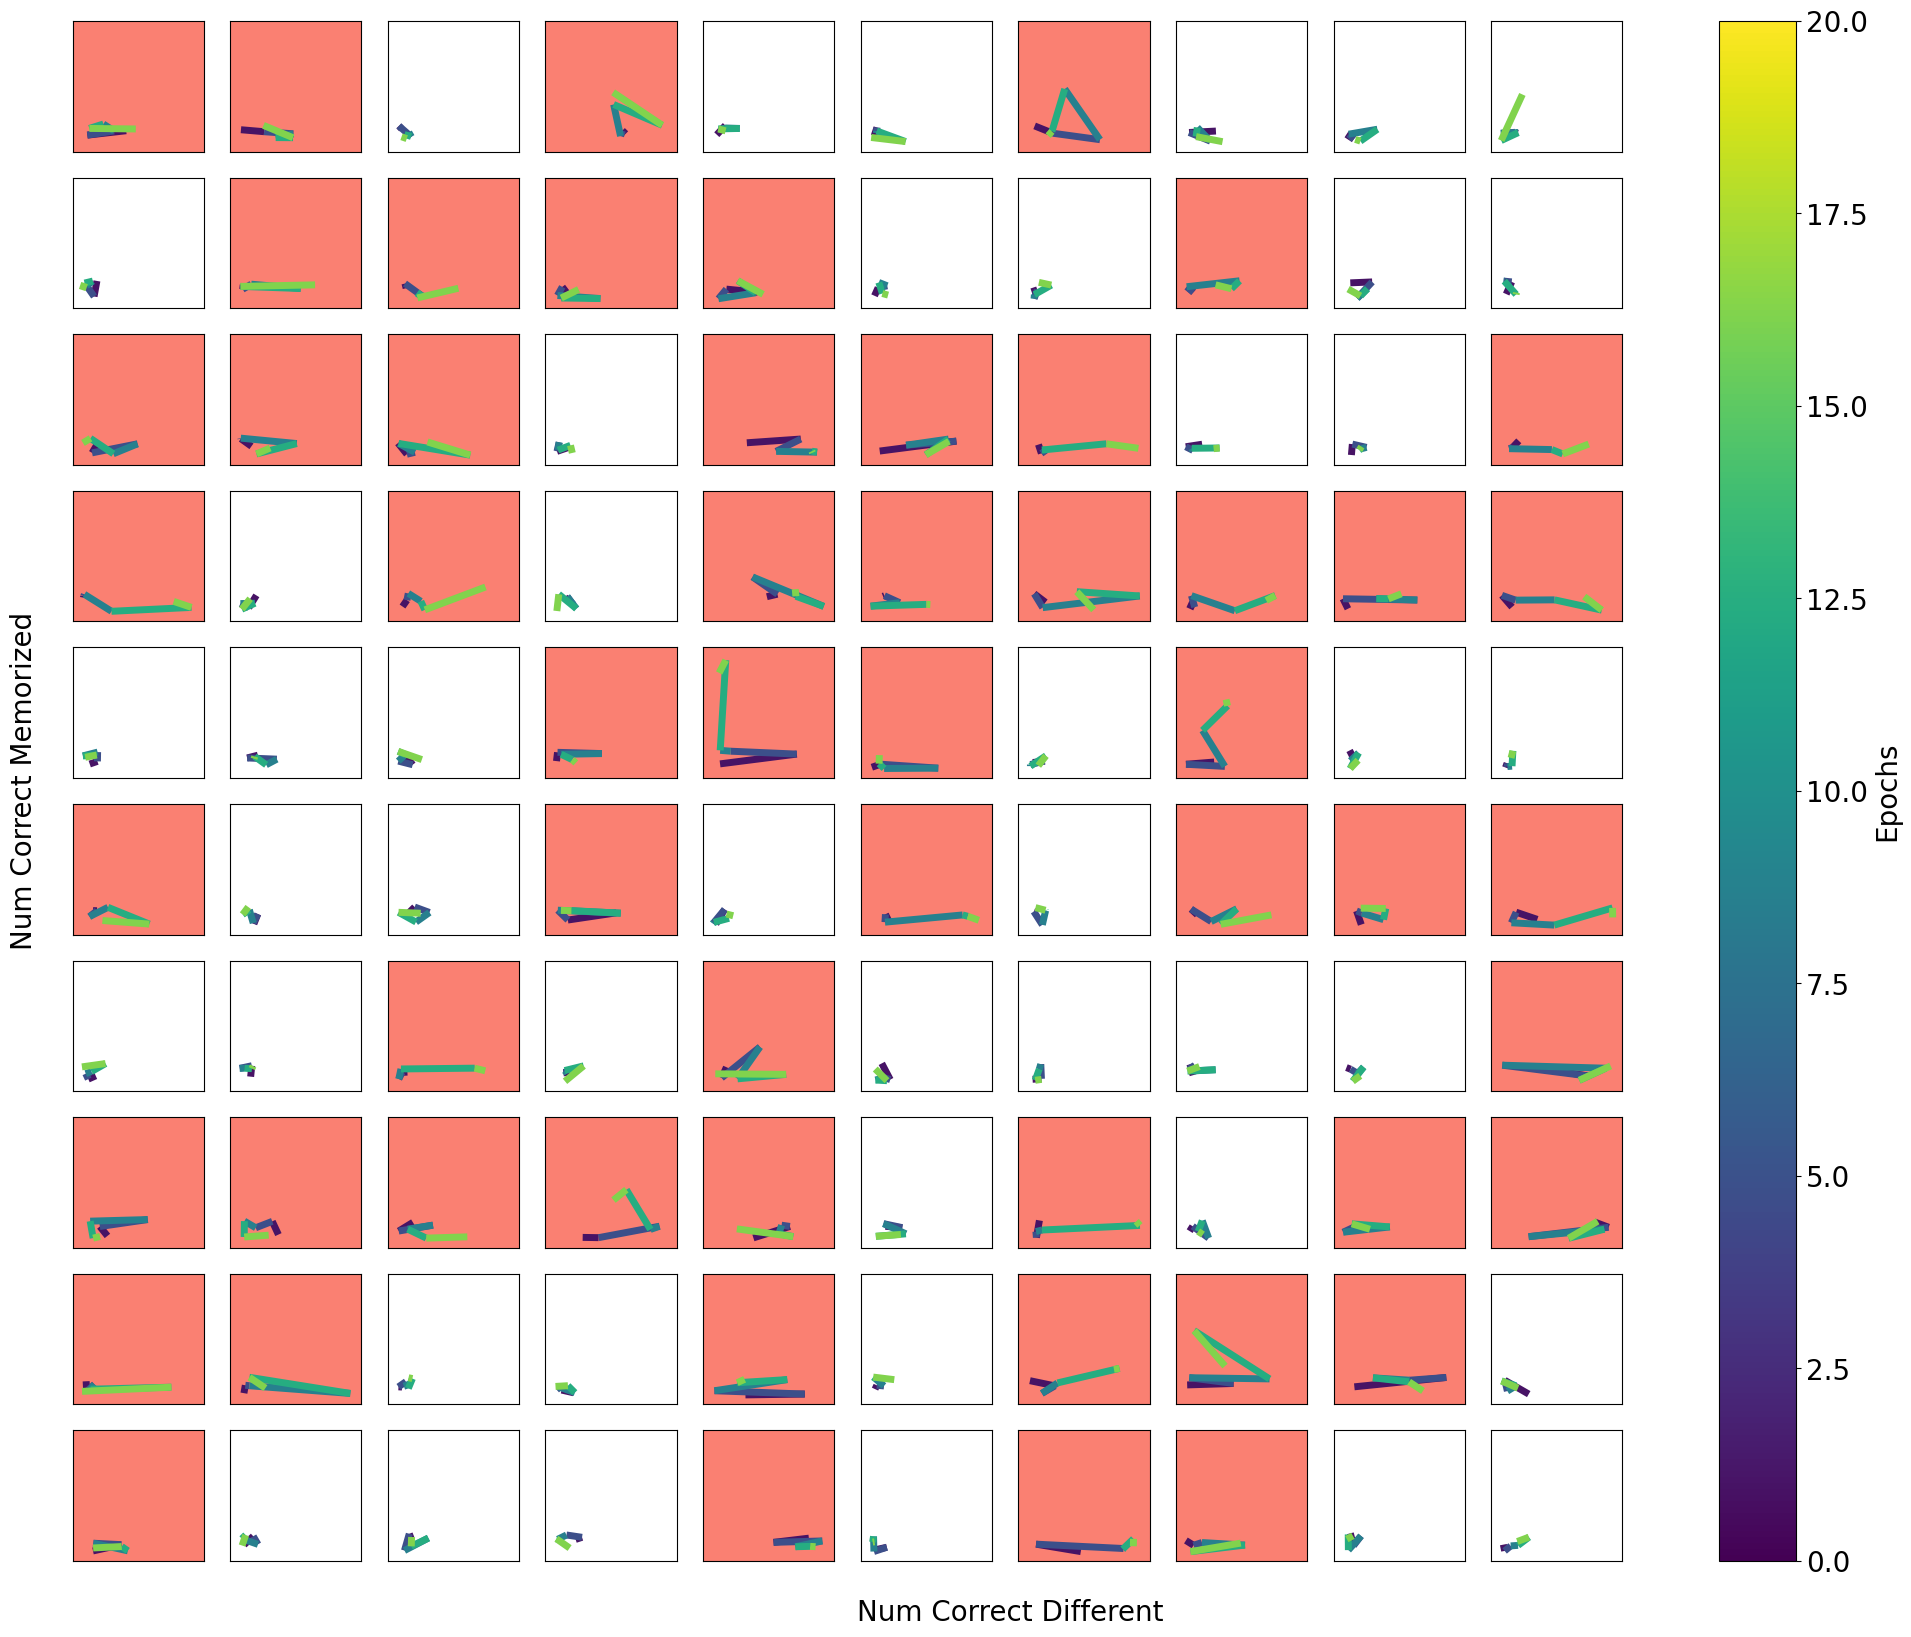

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 6)




for i in range(100):
    x = num_correct_different_all1_weird[:, i]+np.random.uniform(-0.5, 0.5, 6)
    y = num_memorized_all1_weird[:, i]+np.random.uniform(-0.5, 0.5, 6)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete2.png")

In [11]:
(num_memorized_all1_weird).mean(axis=1)

array([0.00361301, 0.01752977, 0.04402516, 0.15375351, 0.20835006,
       0.25531915])

0
[0.01376147 0.09266055 0.3940367  0.72614679 0.91055046 0.96100917]
[0.0266055  0.05321101 0.11651376 0.22706422 0.24036697 0.26605505]
1
[0.06273526 0.19397742 0.42634881 0.71493099 0.90489335 0.96486826]
[0.0391468  0.07327478 0.13375157 0.24140527 0.26524467 0.30539523]
2
[0.11589339 0.26001974 0.53247779 0.7851925  0.92102665 0.96781836]
[0.04639684 0.09575518 0.13879566 0.26554788 0.26989141 0.29970385]
3
[0.18820375 0.38891868 0.62949062 0.83503128 0.94441466 0.98123324]
[0.07363718 0.13512064 0.18480786 0.31974978 0.32636282 0.35835567]
4
[0.23845614 0.4877193  0.70666667 0.88140351 0.96014035 0.98231579]
[0.09838596 0.168      0.21207018 0.34764912 0.33431579 0.37094737]
5
[0.32195304 0.60797615 0.81766679 0.92389117 0.97256802 0.99239657]
[0.1297801  0.2260902  0.26172195 0.40611256 0.38561312 0.43071189]


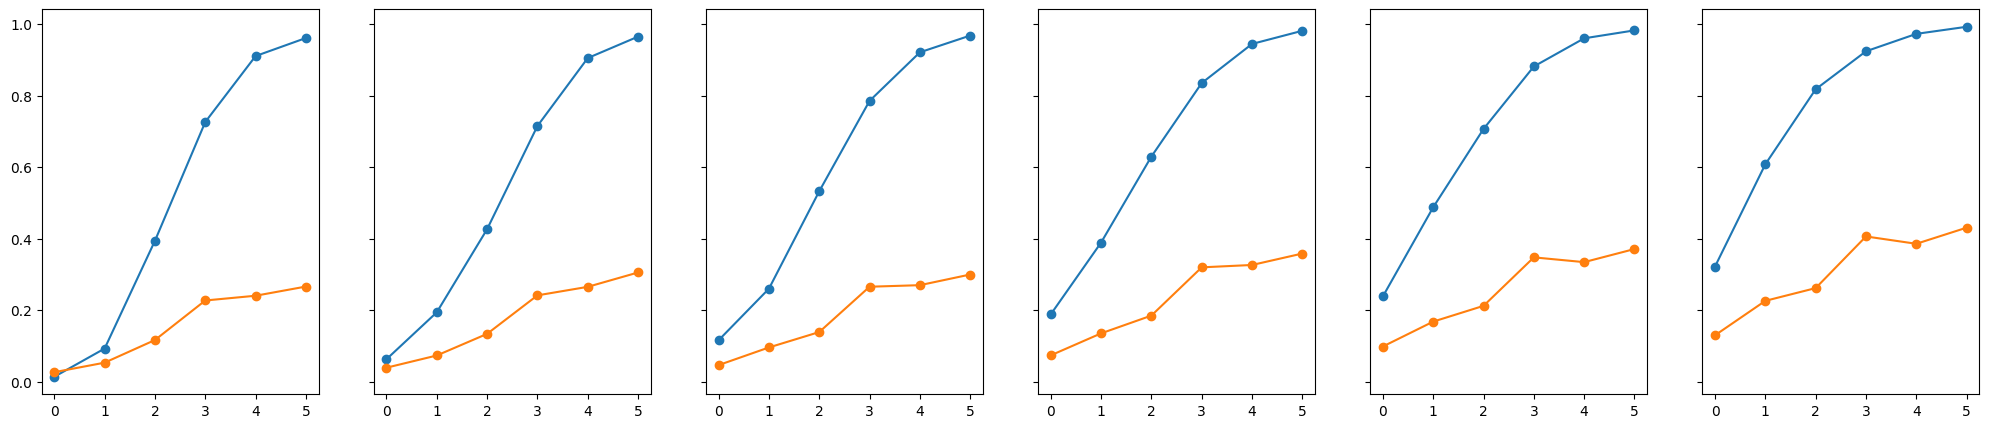

In [44]:

# 5 subplots horizontal

fig, ax = plt.subplots(1, 6, figsize=(25, 5), sharey=True)

for num_different in range(6):
    print(num_different)
    subsample_idxs = np.where(num_correct_different_all1.max(axis=0)==num_different)[0]
    print(1-(num_incorrect_all1[:, subsample_idxs]/5).mean(axis=1))
    print(1-(num_incorrect_all1_weird[:, subsample_idxs]/5).mean(axis=1))
    # print((num_correct_different_all1_weird[:, subsample_idxs]/5).mean(axis=1))
    # print((num_memorized_all1_weird[:, subsample_idxs]/5).mean(axis=1))
    # plt.hist((num_correct_different_all1_weird[:, subsample_idxs]/5)[-1], bins=(np.arange(0, 6)-0.5)/5, alpha=0.5, density=True)
    ax[num_different].plot(1-(num_incorrect_all1[:, subsample_idxs]/5).mean(axis=1), "o-")
    ax[num_different].plot(1-(num_incorrect_all1_weird[:, subsample_idxs]/5).mean(axis=1), "o-")

0
1
2
3
4
5


Text(0.5, 1.0, 'GSM8k lr 5e-5 (6epochs)')

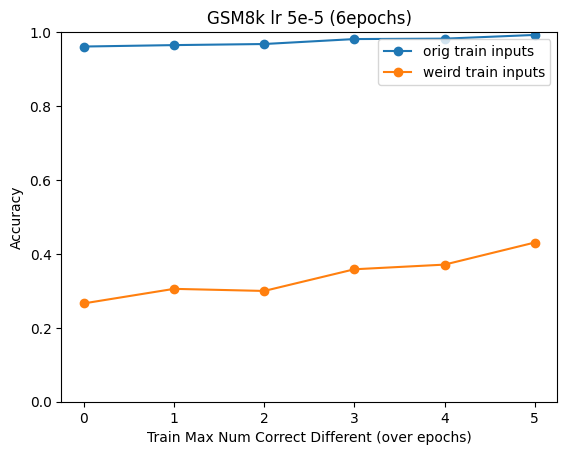

In [59]:
orig= []
weird = []

for num_different in range(6):
    print(num_different)
    subsample_idxs = np.where(num_correct_different_all1.max(axis=0)==num_different)[0]
    orig.append(1-(num_incorrect_all1[-1][subsample_idxs]/5).mean())
    weird.append(1-(num_incorrect_all1_weird[-1][subsample_idxs]/5).mean())
    # orig.append((num_incorrect_all1[-1][subsample_idxs]<5).mean())
    # weird.append((num_incorrect_all1_weird[-1][subsample_idxs]<5).mean())
    
plt.plot(orig, "o-", label = "orig train inputs")
plt.plot(weird, "o-", label = "weird train inputs")

plt.legend()
plt.ylim(0, 1)

plt.ylabel("Accuracy")
plt.xlabel("Train Max Num Correct Different (over epochs)")
plt.title("GSM8k lr 5e-5 (6epochs)")

(array([2.02690972, 1.01779514, 0.68359375, 0.65104167, 0.62065972]),
 array([-0.1,  0.1,  0.3,  0.5,  0.7,  0.9]),
 <BarContainer object of 5 artists>)

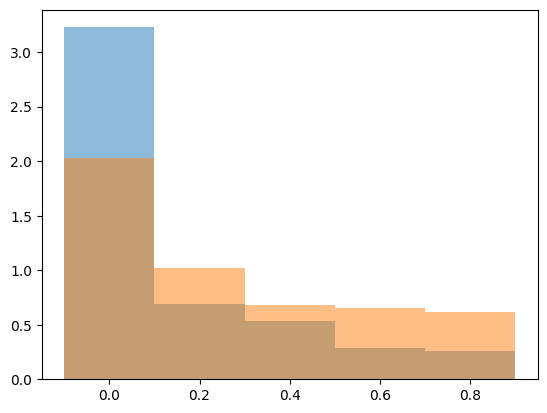

In [38]:
# threshold = 4.5

subsample_idxs = np.where(num_correct_different_all1.max(axis=0)==0)[0]
plt.hist((num_correct_different_all1_weird[:, subsample_idxs]/5)[3], bins=(np.arange(0, 6)-0.5)/5, alpha=0.5, density=True)

subsample_idxs = np.where(num_correct_different_all1.max(axis=0)==5)[0]
plt.hist((num_correct_different_all1_weird[:, subsample_idxs]/5)[3], bins=(np.arange(0, 6)-0.5)/5, alpha=0.5, density=True)

In [15]:
num_correct_different_all1_weird.mean(axis=1)

array([0.43837816, 0.76916901, 0.96574334, 1.52107587, 1.44145591,
       1.58343369])

In [8]:
num_incorrect_all1_weird

array([[3, 5, 5, ..., 5, 5, 4],
       [5, 4, 5, ..., 5, 3, 5],
       [4, 3, 5, ..., 5, 5, 5],
       [4, 4, 5, ..., 5, 0, 5],
       [5, 3, 5, ..., 5, 0, 4],
       [3, 4, 5, ..., 4, 0, 5]])